In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
df = pd.read_csv('weather-check.csv')

In [3]:
df.head()

,RespondentID,Do you typically check a daily weather report?,How do you typically check the weather?,A specific website or app (please provide the answer),"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,3887201482,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,3887159451,Yes,The default weather app on your phone,-,Very likely,18 - 29,Male,Prefer not to answer,-
2,3887152228,Yes,The default weather app on your phone,-,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,3887145426,Yes,The default weather app on your phone,-,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,3887021873,Yes,A specific website or app (please provide the ...,Iphone app,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [4]:
df = df.drop(labels=df.columns[0], axis=1)
df = df.drop(labels=df.columns[2], axis=1)

In [5]:
df.head()

,Do you typically check a daily weather report?,How do you typically check the weather?,"If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?",Age,What is your gender?,How much total combined money did all members of your HOUSEHOLD earn last year?,US Region
0,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$50,000 to $74,999",South Atlantic
1,Yes,The default weather app on your phone,Very likely,18 - 29,Male,Prefer not to answer,-
2,Yes,The default weather app on your phone,Very likely,30 - 44,Male,"$100,000 to $124,999",Middle Atlantic
3,Yes,The default weather app on your phone,Somewhat likely,30 - 44,Male,Prefer not to answer,-
4,Yes,A specific website or app (please provide the ...,Very likely,30 - 44,Male,"$150,000 to $174,999",Middle Atlantic


In [6]:
df_dummy = pd.get_dummies(df)

In [7]:
X = df_dummy.values

In [10]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
scores = []
for n in range(2,21):
    clusterer = KMeans(n_clusters=n, random_state=123)
    cluster_labels = clusterer.fit_predict(X)
    scores.append(silhouette_score(X, cluster_labels))


In [ ]:
answer1 = '{0:0.2f}'.format(max(scores))

In [15]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

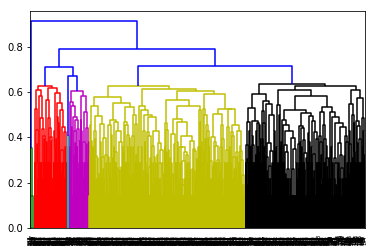

In [17]:
Z = linkage(X, method='average', metric='cosine')
dendr = dendrogram(Z)

In [19]:
label = fcluster(Z, 0.7, criterion='distance')
np.unique(label)

array([1, 2, 3, 4, 5], dtype=int32)

In [21]:
df.loc[:, 'label'] = label

In [27]:
df.columns

Index(['Do you typically check a daily weather report?',
       'How do you typically check the weather?',
       'If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?',
       'Age', 'What is your gender?',
       'How much total combined money did all members of your HOUSEHOLD earn last year?',
       'US Region', 'label'],
      dtype='object')

In [33]:
df.groupby('label')['What is your gender?'].value_counts()

label  What is your gender?
1      -                        12
2      Female                   88
       Male                      4
3      Male                     60
4      Female                  421
       Male                     12
5      Male                    313
       Female                   18
Name: What is your gender?, dtype: int64

In [35]:
answer2 = '{0:0.2f}'.format(313/(313+18))
answer2

'0.95'

In [ ]:
for group in df.groupby('label'):
    print(group)

## DBSCAN

In [36]:
from sklearn.cluster import DBSCAN

In [87]:
labs = []
for eps in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    db = DBSCAN(eps=eps, min_samples=20, metric='cosine')
    db.fit(X)
    labs.append(pd.Series(db.labels_))

In [97]:
for i, s in enumerate(labs):
    print(i)
    print(s.value_counts())

0
-1    928
dtype: int64
1
-1    928
dtype: int64
2
 0    849
-1     79
dtype: int64
3
 0    849
-1     79
dtype: int64
4
 0    916
-1     12
dtype: int64
5
0    928
dtype: int64
6
0    928
dtype: int64
7
0    928
dtype: int64
8
0    928
dtype: int64
9
0    928
dtype: int64


In [100]:
answer3 = '0.50'

In [102]:
print('kmeans {0}\nagg {1}\ndbscan {2}'.format(answer1, answer2, answer3))

kmeans 0.10
agg 0.95
dbscan 0.50
